In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import plotly.express as px
import matplotlib.pyplot as plt

data_df = pd.read_csv("/workspaces/Machine-Learning-Basic-Projects/Classification/Project/Data/churn.csv")

In [2]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(data_df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


The data fall under two categories:
- 17 Categorical features:
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependent: Whether the customer has dependents or not (Yes, No)
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
***
    
- 3 Numerical features:

    - Tenure: Number of months the customer has stayed with the company 
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
      
***

- Prediction feature:
    - Churn: Whether the customer churned or not (Yes or No)
    
    
These features can also be sub-divided into:

- Demographic customer information

    - gender , SeniorCitizen , Partner , Dependents

- Services that each customer has signed up for

    - PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies, 
    
- Customer account information

    - tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### Explore Target variable

In [3]:
import plotly.express as px

target_instance = data_df["Churn"].value_counts().reset_index()
target_instance.columns = ['Category', 'Count']

fig = px.pie(
    target_instance,
    values='Count',
    names='Category',
    color='Category',
    color_discrete_sequence=["#FFFF99", "#FFF44F"],  # canary, lemon
    color_discrete_map={"No": "#E30B5C", "Yes": "#50C878"},  # raspberry, emerald
    title='Distribution of Churn'
)
fig.show()

We are trying to predict users that left the company in the previous month. It is a binary classification problem with an unbalance target.
- Churn: No - 73.5%
- Churn: Yes - 26.5%

### Explore Categorical features

In [4]:
def bar(feature, df=data_df ):

    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})

    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]

    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str

    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    num_str = num_format(percentage)
    cat_str = str_format(categories)
    

    churn_colors = ["#FFFF99", "#FFF44F"]  # canary, lemon
    gender_colors = {"Female": "#E30B5C", "Male": "#50C878"}  # raspberry, emerald

    # Use gender map if feature is gender, otherwise use churn map
    if feature.lower() == "gender":
        fig = px.bar(
            temp_df,
            x=feature,
            y='Count',
            color=feature,
            title=f'Churn rate by {feature}',
            barmode="group",
            color_discrete_map=gender_colors
        )
    else:
        fig = px.bar(
            temp_df,
            x=feature,
            y='Count',
            color='Churn',
            title=f'Churn rate by {feature}',
            barmode="group",
            color_discrete_sequence=churn_colors
        )

    fig.add_annotation(
        text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=1.4,
        y=1.3,
        bordercolor='black',
        borderwidth=1)
    fig.update_layout(
        margin=dict(r=400),
    )
    return fig.show()

In [5]:
bar('gender')

data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
bar('SeniorCitizen')

bar('Partner')

bar('Dependents')

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/726057969.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



***
**Demographic analysis Insight**: 
Gender and partner are even distributed with approximate percentage values. The difference in churn is slightly higher in females but the diffreence is negligible. There is a higher proportion of churn amongst younger customers (where SeniorCitizen is No), customers with no partners and customers with no dependents. These analysis on demographic section of data highlights on-senior citizens with no partners and dependents describe a particular segment of customers that are likely to churn.
***

In [6]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



***
**Services that each customer has signed up for Insight**:
These category of features shows significant variations across their values. If a customer does not have a phone service, he/she cannot have multiple lines. About 90.3% of the customers have phone services and have the higher rate to churn. Customers who have Fibre optic as internet service are more likely to churn, this can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn. Customers with  OnlineSecurity ,OnlineBackup ,DeviceProtection and TechSupport  are more unlikely to churn. Streaming service is not predictive for churn as it evenly distributed to yes and no options.
***

In [7]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



**Payment**:
***
The shorter the contract the higher churn rate as those with longer plans face additional barriers when cancelling prematurely. This clearly explains the motivation for companies to have long-term relationship with their customers. Churn Rate is higher for the customers who opted for paperless billing, About 59.2% of the customers make paperless billing. Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.
***

### Explore Numeric features

In [8]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ' '


In [10]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')

data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

In [11]:
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [12]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

***
**Customer account information**: The tenure histogram is rightly skewed and shows that majority of customers has been with the telecom company for just the first few months (0-9 months) and the highest rate of churn is also in that first few months (0-9months). 75% of customers who end up leaving Telcom company  do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate (This suggests that discounts and promotions can be an enticing reason for customers to stay). The total charge trend is quite depict due to variation in frequency.
Lets bin the numeric features into 3 sections based on quantiles (low, medium and high to get more information from it).
***

In [13]:
bin_df = pd.DataFrame()

bin_df['tenure_bins'] =  pd.qcut(data_df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(data_df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(data_df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = data_df['Churn']

bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)

/tmp/ipykernel_1637/1564090491.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



/tmp/ipykernel_1637/1564090491.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_1637/1564090491.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1637/1564090491.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



***
Based on binning, the low tenure and high monthly charge bins have higher churn rates as supported with the previous analysis. While the low Total charge bin has a higher churn rate. 
***

### Data preprocessing

In [14]:
data_df.drop(["customerID"],axis=1,inplace = True)

def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

data_df['Churn'] = data_df[['Churn']].apply(binary_map)

data_df['gender'] = data_df['gender'].map({'Male':1, 'Female':0})

binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

data_df = pd.get_dummies(data_df, drop_first=True)

In [15]:
corr = data_df.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Correlation is a statistical term is a measure on linear relationship with two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So when two features have a high correlation, we can drop one of the two features.

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]
data_df.columns = all_columns

glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Sat, 31 May 2025   Deviance:                       5829.3
Time:                        16:50:26   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [17]:
np.exp(res.params)

Intercept                                        2.287343
MultipleLines_No_phone_service[T.True]           1.382358
MultipleLines_Yes[T.True]                        1.563475
InternetService_Fiber_optic[T.True]              5.771657
InternetService_No[T.True]                       0.774257
OnlineSecurity_No_internet_service[T.True]       0.774257
OnlineSecurity_Yes[T.True]                       0.814269
OnlineBackup_No_internet_service[T.True]         0.774257
OnlineBackup_Yes[T.True]                         1.026127
DeviceProtection_No_internet_service[T.True]     0.774257
DeviceProtection_Yes[T.True]                     1.159152
TechSupport_No_internet_service[T.True]          0.774257
TechSupport_Yes[T.True]                          0.836193
StreamingTV_No_internet_service[T.True]          0.774257
StreamingTV_Yes[T.True]                          1.806134
StreamingMovies_No_internet_service[T.True]      0.774257
StreamingMovies_Yes[T.True]                      1.829067
Contract_One_y

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['tenure'] = sc.fit_transform(data_df[['tenure']])
data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

#### Creating a baseline model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
X = data_df.drop('Churn', axis=1)
y = data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

In [20]:
def modeling(alg, alg_name, params={}):
    model = alg(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [21]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7979176526265973
precision:  0.6274509803921569
recall:  0.5745062836624776
f1_score:  0.7949702200781946


In [22]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

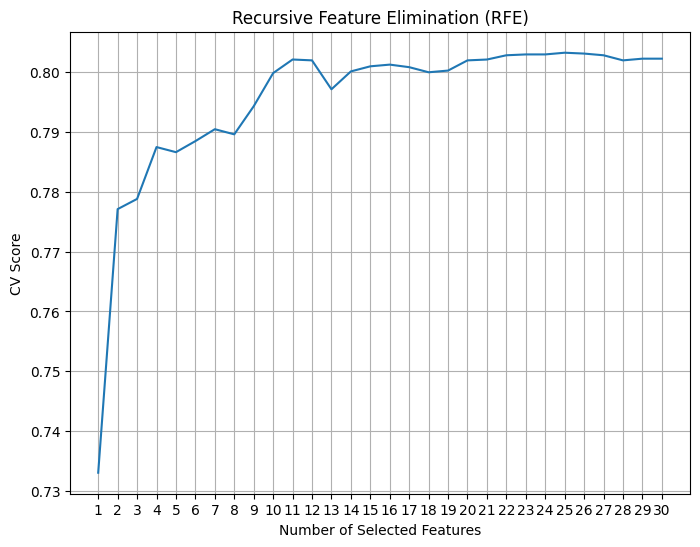

The optimal number of features: 25


In [23]:
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score']
)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [24]:
X_rfe = X.iloc[:, rfecv.support_]

print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (7043, 25)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fi

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

In [26]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.8012304779933743
precision:  0.6361829025844931
recall:  0.5745062836624776
f1_score:  0.7978626093178417


In [27]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.7960246095598675
precision:  0.6431818181818182
recall:  0.5080789946140036
f1_score:  0.7877515790466652


In [28]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7808802650260294
precision:  0.6004273504273504
recall:  0.5044883303411131
f1_score:  0.7744134437805346


In [29]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7340274491244676
precision:  0.4957410562180579
recall:  0.5224416517055656
f1_score:  0.7362203711593462


In [30]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6436346426881212
precision:  0.41792294807370184
recall:  0.895870736086176
f1_score:  0.6625965549469691


In [31]:
model = LogisticRegression()
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_rfe, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8046269208037826
Best Hyperparameters: {'C': np.float64(8.963755985723973), 'penalty': 'l2', 'solver': 'liblinear'}


/workspaces/Machine-Learning-Basic-Projects/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


9390 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1879 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/Machine-Learning-Basic-Projects/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/Machine-Learning-Basic-Projects/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~

In [32]:
params = result.best_params_
params

{'C': np.float64(8.963755985723973), 'penalty': 'l2', 'solver': 'liblinear'}

In [33]:
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)

Logistic Regression Classification
accuracy:  0.8017037387600567
precision:  0.6369047619047619
recall:  0.5763016157989228
f1_score:  0.798411305069317


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_rfe and y have already been created and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)

# Create ANN model
model_ann = Sequential()
model_ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model_ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
loss, accuracy = model_ann.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = (model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import joblib

filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']